# Concrete Strength Prediction Project

This Jupyter Notebook demonstrates a data science project aimed at predicting the compressive strength of concrete based on its ingredients and curing time. 

## 1. Introduction
### Objectives
The main objective is to build predictive models that can accurately estimate the compressive strength of concrete given various factors such as age of concrete, the amount of cement, water, and other materials used.

### Data
This dataset contains information on various ingredients used in concrete production and the resulting compressive strength of the concrete. Understanding these features is crucial for predicting the concrete's performance. The features include:

1. **Cement (kg/m³)**: The amount of cement in the concrete mix, a primary binder that significantly influences the strength and durability of the concrete.

2. **Blast Furnace Slag (kg/m³)**: A by-product from the steel industry, used as a partial substitute for cement to improve the mix's strength and reduce costs.

3. **Fly Ash (kg/m³)**: A fine powder produced as a by-product from burning pulverized coal, used to replace some of the cement content, enhancing workability and long-term strength.

4. **Water (kg/m³)**: The amount of water in the mix, crucial for the hydration process of cement. 

5. **Superplasticizer (kg/m³)**: Chemical admixtures added to the concrete to improve its workability without increasing water content, which can lead to stronger and more durable concrete.

6. **Coarse Aggregate (kg/m³)**: Larger particles, such as gravel, used to provide bulk and strength to the concrete mix.

7. **Fine Aggregate (kg/m³)**: Smaller particles, such as sand, which fill the voids between the coarse aggregates and contribute to the overall strength and workability.

8. **Age (days)**: The age of the concrete when the strength is measured. The compressive strength of concrete increases over time as it cures, making this a vital feature in predicting the final strength.

9. **Strength (MPa)**: The target variable representing the compressive strength of the concrete. This is measured in megapascals (MPa) and indicates the maximum load the concrete can withstand per unit area.

Each feature in the dataset plays a specific role in determining the concrete's final properties. By analyzing these features, we can develop predictive models to estimate the compressive strength of different concrete mixes, helping in optimizing mix designs for various construction needs.


## 2. Data Loading and Initial Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'concrete_data.csv'  # file path
concrete_data = pd.read_csv(file_path)
df=concrete_data
# Tabelle als HTML anzeigen mit Scrollen
display(HTML(df.to_html(max_rows=20, max_cols=None)))

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### Checking for Duplicates

Duplicate records can skew analysis results and should be handled appropriately. We will check for both exact duplicates and potential duplicates with slight variations.


In [5]:
# Check for exact duplicates
duplicate_rows = concrete_data[concrete_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicates if they exist
if duplicate_rows.shape[0] > 0:
    display(duplicate_rows)


Number of duplicate rows: 25


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


### Handling Duplicates

If duplicates are found, we need to decide whether to remove them, combine them, or further investigate. Here, we will remove exact duplicates.


In [7]:
# Remove exact duplicates
concrete_data = concrete_data.drop_duplicates()
print(f"Data shape after removing duplicates: {concrete_data.shape}")


Data shape after removing duplicates: (1005, 9)


### Checking for Missing Values

Missing data can impact the quality of analysis and modeling. We will identify missing values and assess their patterns.


In [9]:
# Check for missing values
missing_values = concrete_data.isnull().sum()
missing_percent = (missing_values / concrete_data.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

# Displaying missing values, if any
if missing_values.any():
    missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
    display(HTML("<h3>Missing Values</h3>"))
    display(missing_values_df)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


### Exploring Unique Values and Data Consistency

It is essential to understand the distribution of unique values in categorical variables and ensure data consistency, especially for categories that should be mutually exclusive.


In [11]:
# Check unique values for each column
for column in concrete_data.columns:
    unique_values = concrete_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")
    
    # Optionally display unique values for categorical columns
    if unique_values < 50:  # Adjust the threshold as needed
        print(f"Unique values in '{column}': {concrete_data[column].unique()}")
        print("\n")


Column 'Cement' has 278 unique values.
Column 'Blast Furnace Slag' has 185 unique values.
Column 'Fly Ash' has 156 unique values.
Column 'Water' has 195 unique values.
Column 'Superplasticizer' has 111 unique values.
Column 'Coarse Aggregate' has 284 unique values.
Column 'Fine Aggregate' has 302 unique values.
Column 'Age' has 14 unique values.
Unique values in 'Age': [ 28 270 365 360  90 180   3   7  56  91  14 100 120   1]


Column 'Strength' has 845 unique values.


### Identifying Identical Mixtures

In this section, we investigate whether any concrete mixtures in the dataset have identical compositions, excluding `Age` and `Strength`. Identifying such mixtures can provide insights into the consistency of the mixture formulations and potentially highlight duplicated records or standard mixtures used across different projects.

**Steps:**
1. **Exclusion of `Age` and `Strength`**: We focus on the remaining features (`Cement`, `Blast Furnace Slag`, `Fly Ash`, `Water`, `Superplasticizer`, `Coarse Aggregate`, `Fine Aggregate`) to identify identical mixtures.
2. **Detection of Identical Rows**: Using these features, we identify rows that have identical values, representing the same mixture composition.
3. **Assigning Mixture Numbers**: To uniquely identify each set of identical mixtures, we assign a mixture number to each group.

This analysis will help us understand the prevalence of identical mixture compositions and their potential impact on the dataset's diversity and quality.


In [13]:
# Check for identical rows excluding 'Age' and 'Strength'
columns_to_check = concrete_data.columns.difference(['Age', 'Strength'])

# Find rows with identical values in the selected columns
identical_rows = concrete_data[concrete_data.duplicated(subset=columns_to_check, keep=False)]

# Number of identical mixtures (excluding Age and Strength)
number_of_identical_mixtures = identical_rows.shape[0]

print(f"Number of identical mixtures (excluding Age and Strength): {number_of_identical_mixtures}")

# Display the first few rows of the identical mixtures
display(identical_rows.head())

# Assign mixture numbers to identical mixtures
concrete_data['Mixture Number'] = (
    concrete_data.groupby(columns_to_check.tolist()).ngroup() + 1
)

# Display the first few rows with the assigned mixture numbers
concrete_data.head()

# Count the number of unique mixture compositions
unique_mixture_count = concrete_data['Mixture Number'].nunique()
print(f"Total number of unique mixture compositions: {unique_mixture_count}")


Number of identical mixtures (excluding Age and Strength): 759


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


Total number of unique mixture compositions: 427


## 3. Exploratory Data Analysis (EDA)

In [15]:
from IPython.display import display, HTML

# Summary statistics
summary_stats = concrete_data.drop(columns=['Mixture Number']).describe()

# Formatting summary statistics for display
summary_stats_style = summary_stats.style.format("{:.2f}")

# Displaying summary statistics and missing values in a clean format
display(HTML("<h3>Summary Statistics</h3>"))
display(summary_stats_style)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00
mean,278.63,72.04,55.54,182.08,6.03,974.38,772.69,45.86,35.25
std,104.34,86.17,64.21,21.34,5.92,77.58,80.34,63.73,16.28
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,190.70,0.00,0.00,166.60,0.00,932.00,724.30,7.00,23.52
50%,265.00,20.00,0.00,185.70,6.10,968.00,780.00,28.00,33.80
75%,349.00,142.50,118.30,192.90,10.00,1031.00,822.20,56.00,44.87
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


### Summary Statistics

The summary statistics provide key insights into the central tendency, dispersion, and range of the features in the dataset:

- **Central Tendency**: The mean and median values offer a sense of the average or most typical values for each feature. For example, the average amount of `Cement` used is approximately 281 kg/m³, while the `Strength` of concrete averages around 35.82 MPa.

- **Dispersion**: The standard deviation highlights the variability within each feature. Features show considerable standard deviations, indicating diverse concrete mix designs.

- **Range and Quartiles**: The minimum, maximum, and quartile values (25th, 50th, 75th percentiles) provide a snapshot of the data's spread. For instance, the `Age` of the concrete varies widely from 1 to 365 days, reflecting different curing periods.

These initial insights lay the groundwork for deeper exploratory data analysis and feature engineering, ensuring that the data is ready for accurate and reliable predictive modeling.


### Histogram Analysis
The histograms provide a visual representation of the distribution of each feature in the dataset


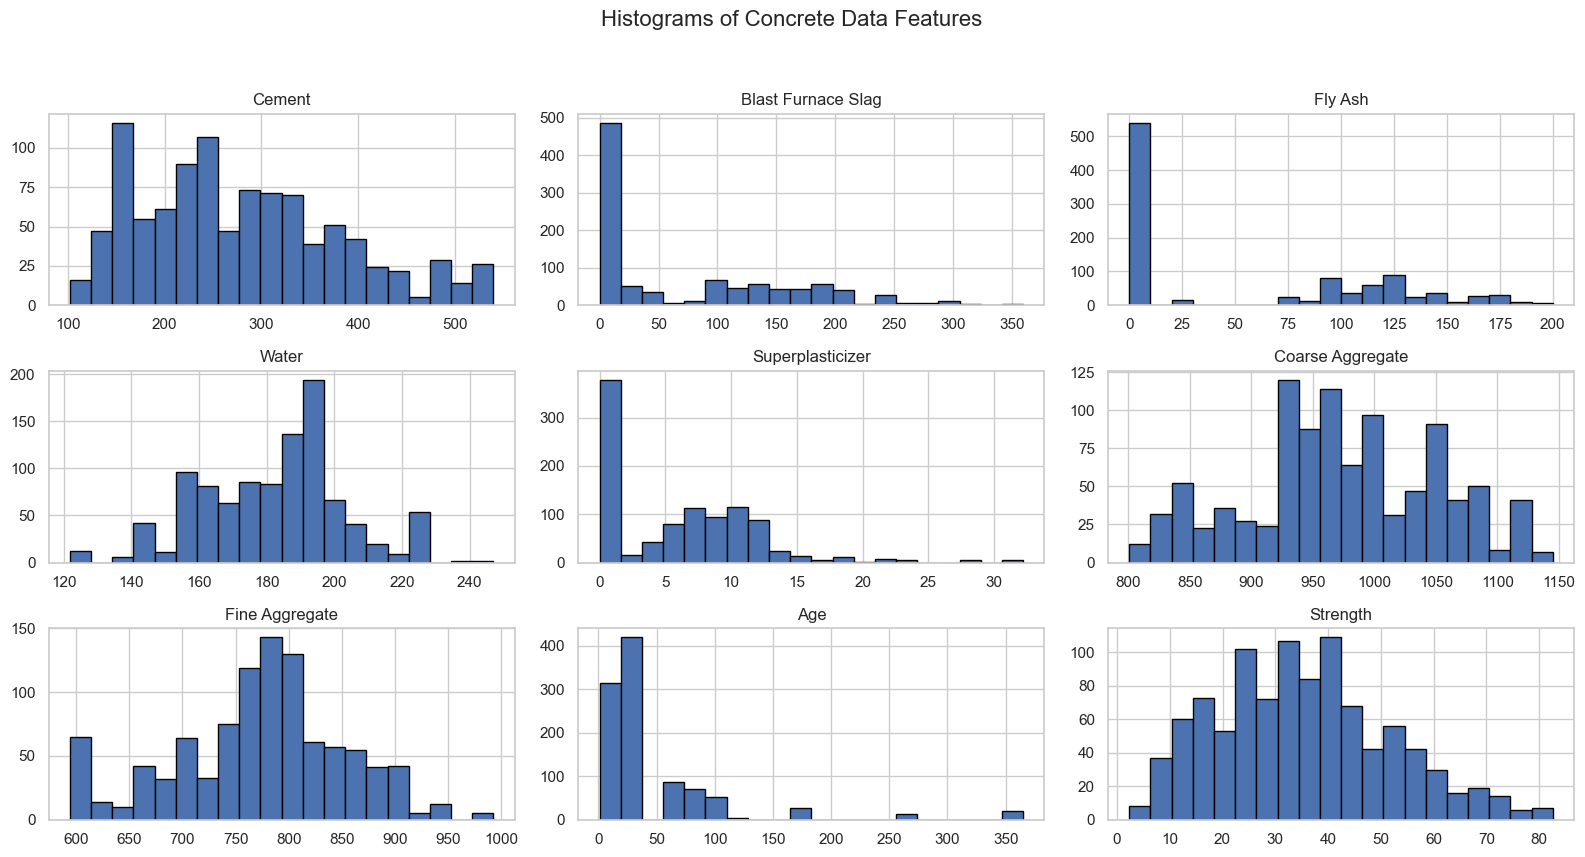

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for each feature
concrete_data.drop(columns=['Mixture Number']).hist(figsize=(16, 9), bins=20, edgecolor='black', layout=(3, 3))
plt.suptitle('Histograms of Concrete Data Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **General Distribution**: Most features show a reasonably normal distribution, indicating a diverse range of values. This suggests that the dataset encompasses a broad spectrum of concrete mix designs.

- **Outliers**: There are no significant outliers, which is beneficial as it reduces the need for extensive data cleaning or outlier removal.

- **Zero Values**: Certain features, such as `Blast Furnace Slag`, `Fly Ash`, and `Superplasticizer`, contain a considerable number of zero values. This implies that these materials were not used in many concrete mixes, potentially affecting the compressive strength predictions.


### Correlation Matrix

We explore the relationships between various features of a concrete dataset using a correlation matrix. The correlation matrix helps us understand the linear dependencies between variables. The values range from -1 to 1, indicating the strength and direction of the linear relationship:

- **1** indicates a perfect positive linear relationship.
- **-1** indicates a perfect negative linear relationship.
- **0** indicates no linear relationship.


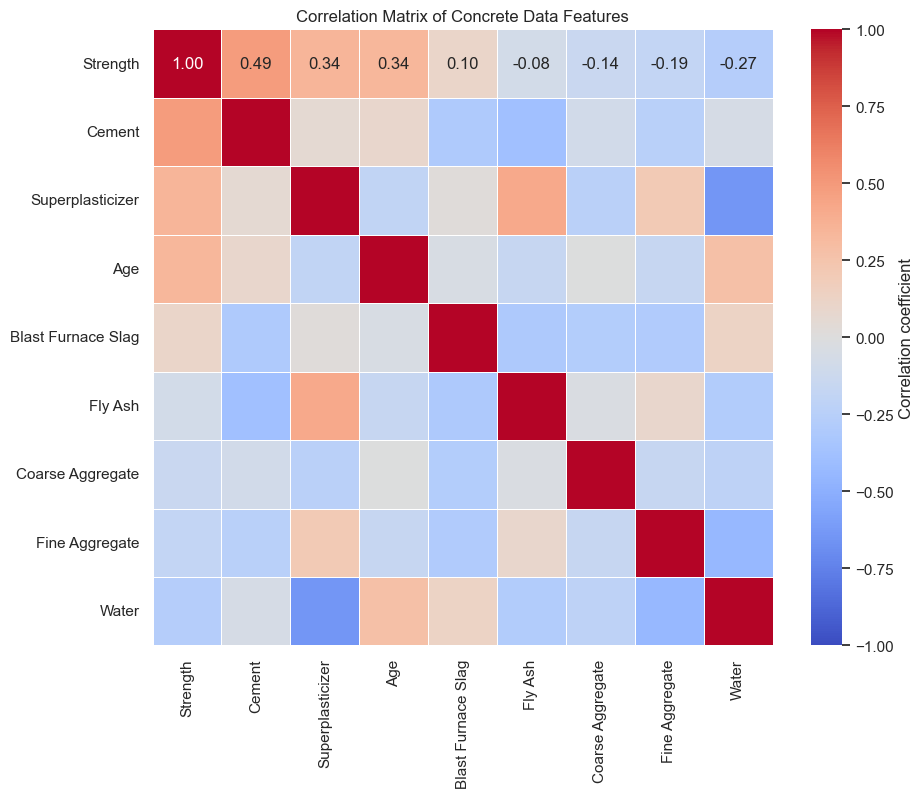

In [21]:
# Plotting the full correlation matrix with a focus on 'Strength' as the main row of interest
correlation_matrix = concrete_data.drop(columns=['Mixture Number']).corr()

# Reorder the correlation matrix to place 'Strength' at the top
correlation_matrix = correlation_matrix.sort_values(by='Strength', ascending=False)
correlation_matrix = correlation_matrix.sort_values(by='Strength', axis=1, ascending=False)

# # Plotting the heatmap of the correlation matrix with 'Strength' row highlighted
# plt.figure(figsize=(16, 9))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
# plt.title('Correlation Matrix with Strength Highlighted', fontsize=16)
# plt.show()

# Plotting the correlation matrix with a color legend from -1 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation Matrix of Concrete Data Features")
plt.show()


### Correlation Matrix Analysis
The correlation matrix provided gives a numerical representation of the linear relationships between the features in the concrete dataset. Here are some key observations based on the matrix:

1. **Cement and Strength**:
   - **Correlation Coefficient: 0.49**
   - This positive correlation suggests that an increase in the amount of cement generally leads to an increase in concrete strength, indicating a moderately strong linear relationship.

2. **Water and Strength**:
   - **Correlation Coefficient: -0.27**
   - There is a weak negative correlation between water content and strength, implying that higher water content tends to slightly decrease the concrete's strength.

3. **Superplasticizer and Strength**:
   - **Correlation Coefficient: 0.34**
   - The presence of superplasticizer shows a moderate positive correlation with strength, suggesting it enhances concrete strength to some extent.

4. **Other Features**:
   - Features like *Blast Furnace Slag*, *Fly Ash*, and *Fine Aggregate* show weaker correlations with strength, indicating they have less direct impact on the strength in a linear sense.
   - The correlation between *Fly Ash* and *Superplasticizer* indicates a moderate relationship, potentially due to the common usage of these materials in specific concrete formulations.

5. **Inter-feature Relationships**:
   - Some features exhibit notable correlations with each other, such as the negative correlation between *Water* and *Superplasticizer*. This could reflect a trade-off in the mixture components where increasing one component reduces the need for the other.

### Key Considerations:
- **Correlation Does Not Imply Causation**: The correlation matrix only indicates linear relationships and does not imply causation. Further analysis is necessary to understand the underlying reasons for these relationships.
- **Non-linear Relationships**: The matrix does not capture non-linear relationships or interactions between multiple features, which may exist in the data. Advanced modeling techniques can explore these complex interactions further.
- **Feature Engineering**: Depending on the application's goals, feature engineering might be necessary to enhance the predictive power or interpretability of the model.

This initial analysis provides a good starting point for exploring the data but should be complemented with more comprehensive studies to understand the underlying patterns and interactions fully.


### Scatter Plots

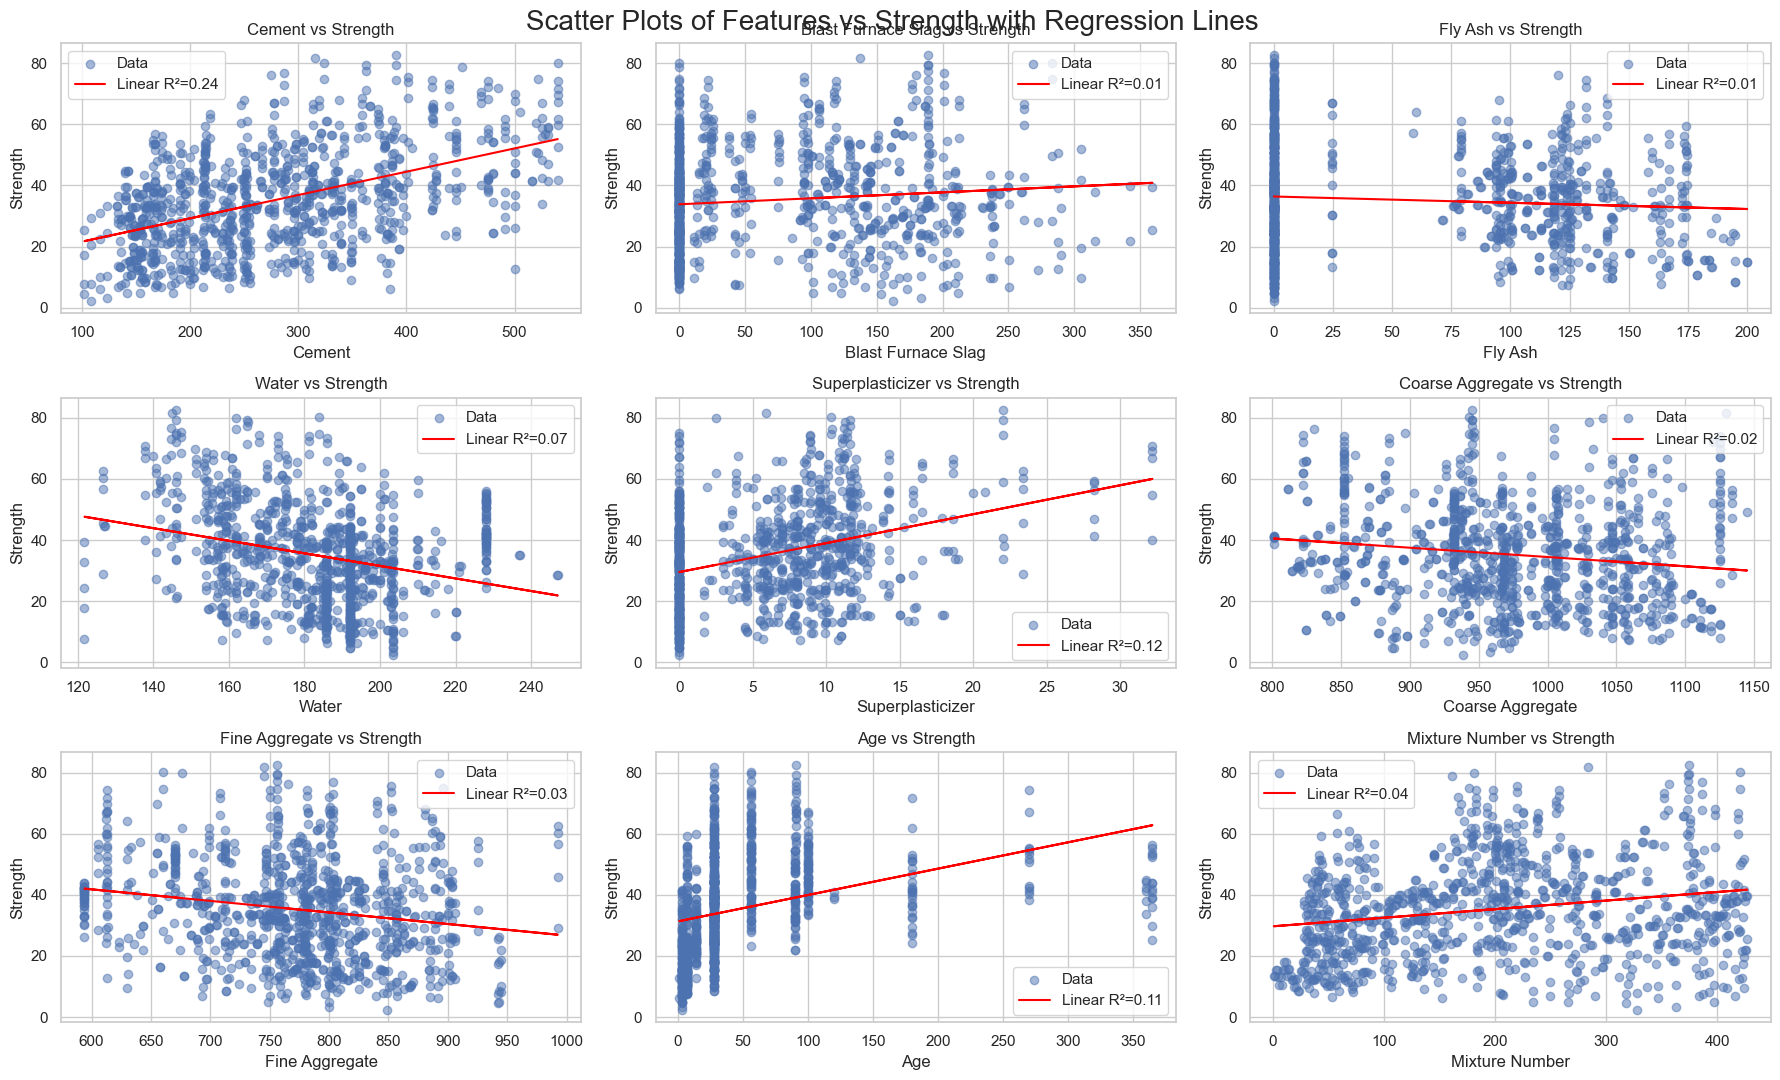

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# List of features to plot against Strength
features = concrete_data.columns.drop('Strength')

# Create a 3x3 grid for the scatter plots with linear regression lines
plt.figure(figsize=(18, 11))
for i, feature in enumerate(features):
    if i >= 9:  # Avoid trying to plot more than 9 subplots
        break
    plt.subplot(3, 3, i + 1)
    plt.scatter(concrete_data[feature], concrete_data['Strength'], alpha=0.5, label='Data')
    
    # Linear regression (with intercept)
    X_feat = concrete_data[feature].values.reshape(-1, 1)
    model_feat = LinearRegression()
    model_feat.fit(X_feat, concrete_data['Strength'])
    y_pred_feat = model_feat.predict(X_feat)
    r2_feat = r2_score(concrete_data['Strength'], y_pred_feat)
    
    # Plot linear regression line
    plt.plot(concrete_data[feature], y_pred_feat, color='red', label=f'Linear R²={r2_feat:.2f}')
    
    plt.title(f'{feature} vs Strength')
    plt.xlabel(feature)
    plt.ylabel('Strength')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs Strength with Regression Lines', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()


### Observations
The scatter plots above show the relationship between each feature and the target variable, `Strength`. These plots help visualize whether there is a linear relationship between the features and `Strength`.

1. **Cement vs Strength**: There appears to be a positive linear trend, suggesting that as the amount of cement increases, the compressive strength of the concrete also tends to increase.

2. **Blast Furnace Slag vs Strength**: The relationship is less clear, with some positive trend but more scattered data points, indicating a weaker linear relationship.

3. **Fly Ash vs Strength**: There doesn't seem to be a strong linear relationship; the data points are quite dispersed.

4. **Water vs Strength**: There is a slight negative trend, where higher water content seems to correlate with lower strength, although the relationship is not strongly linear.

5. **Superplasticizer vs Strength**: The scatter plot shows some linear trend, indicating that superplasticizers might have a moderate effect on increasing concrete strength.

6. **Coarse Aggregate vs Strength** and **Fine Aggregate vs Strength**: Both aggregates show weak linear relationships with strength, with the data points being widely scattered.

7. **Age vs Strength**: A positive trend is observed, indicating that concrete strength increases with age.

#### Conclusion:
While some features show a fairly linear relationship with `Strength`, others do not exhibit strong linear trends. This analysis is crucial for deciding whether to apply linear models or consider transformations or non-linear models for better prediction accuracy.

### Strength vs. Age for Different Mixture Compositions by Water Content

This analysis categorizes the data into three groups based on water content:
1. **Low Water**: Mixtures with water content below 165 kg/m³.
2. **Medium Water**: Mixtures with water content between 165 and 192 kg/m³.
3. **High Water**: Mixtures with water content above 192 kg/m³.

Each plot shows the relationship between the compressive strength of concrete and the curing age, segmented by the water content category. The legend is omitted due to the large number of mixture compositions, focusing on the general trends within each water category.


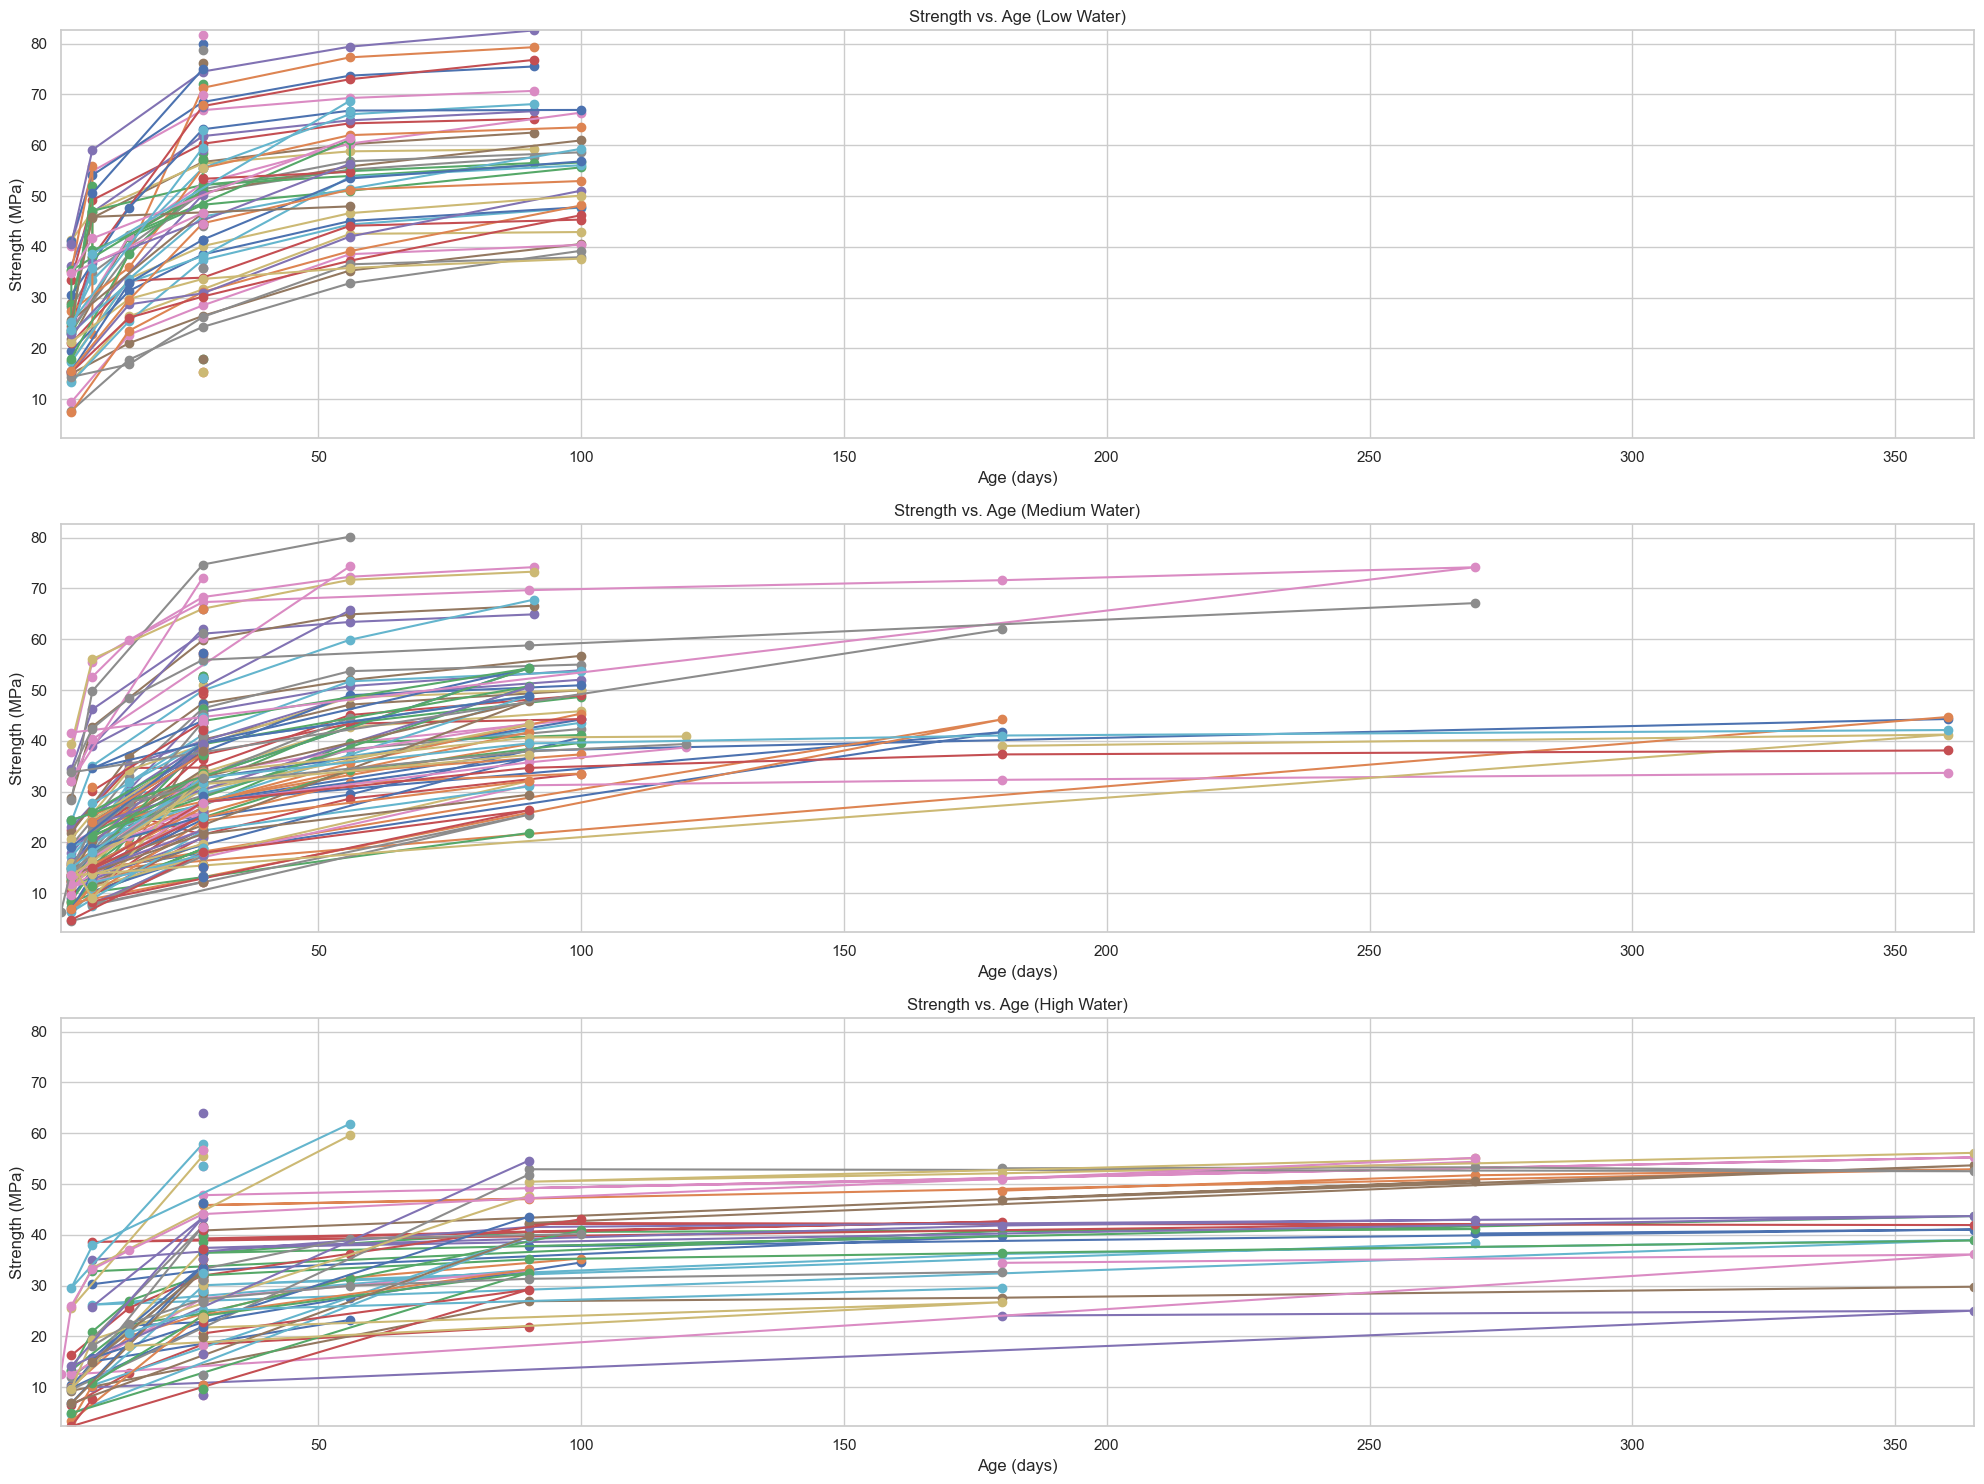

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define water content categories
low_water_threshold = 165
high_water_threshold = 192

# Add a new column for water category
concrete_data['Water Category'] = pd.cut(concrete_data['Water'], 
                                         bins=[-float('inf'), low_water_threshold, high_water_threshold, float('inf')],
                                         labels=['Low Water', 'Medium Water', 'High Water'])

# Plotting Strength vs. Age for different Mixture Numbers categorized by Water Content with consistent axes
plt.figure(figsize=(20, 15))

# Categories for water content
water_categories = ['Low Water', 'Medium Water', 'High Water']

# Set axis limits for consistent comparison
age_min, age_max = concrete_data['Age'].min(), concrete_data['Age'].max()
strength_min, strength_max = concrete_data['Strength'].min(), concrete_data['Strength'].max()

for idx, category in enumerate(water_categories, 1):
    plt.subplot(3, 1, idx)
    category_data = concrete_data[concrete_data['Water Category'] == category]
    unique_mixtures = category_data['Mixture Number'].unique()
    
    for mixture in unique_mixtures:
        mixture_data = category_data[category_data['Mixture Number'] == mixture]
        plt.plot(mixture_data['Age'], mixture_data['Strength'], marker='o', linestyle='-')

    
    plt.title(f'Strength vs. Age ({category})')
    plt.xlabel('Age (days)')
    plt.ylabel('Strength (MPa)')
    plt.xlim(age_min, age_max)
    plt.ylim(strength_min, strength_max)
    plt.grid(True)
    
plt.tight_layout()
plt.show()


### Analysis of the Influence of Time and Water Content on Concrete Strength

#### Influence of Curing Time on Concrete Strength
Curing time, or the age of concrete, plays a crucial role in developing its compressive strength. As concrete cures, the hydration process enables cement particles to bond, increasing the material's strength. This strength development follows a saturation curve, where the initial days see rapid strength gains, which then slow down, and eventually plateau. Typically, the industry standard uses 28 days as a benchmark for assessing concrete strength, assuming most of the strength potential has been reached.

However, this saturation point can vary depending on several factors, including the water content in the mixture and environmental factors like weather. The data suggests that while lower water content mixtures may reach their strength potential around 56 days, those with higher water content continue to gain strength beyond this period, sometimes taking 91 days or more to fully stabilize. This extended period before reaching saturation highlights the critical role of water content in the curing process.

In the industry, the typical curing time for concrete is:

1. **Initial Strength**: About 24 hours, reaching 15-20% of final strength.
2. **Early Strength**: After 7 days, around 70% of final strength.
3. **Full Strength**: After 28 days, achieving 90-100% of its designed strength.

These times can vary based on mix, temperature, and project requirements.

#### Impact of Water Content on Concrete Strength
Water content significantly affects the final strength of concrete. While water is necessary for the hydration of cement, facilitating strength development, the relationship between water content and strength is not straightforward.

#### Negative Influence of High Water Content
Excess water in the concrete mix can lead to increased porosity. This occurs because the surplus water that does not react during the hydration process evaporates, leaving behind voids. These voids weaken the concrete, reducing its density and compressive strength. Our analysis indicates that higher water content is associated with lower strength, particularly evident at 28 days. However, as shown in the plots, mixtures with higher water content often take longer to achieve their final strength, with significant strength gains continuing beyond the typical 28-day mark. This trend suggests that the saturation curve's plateau phase shifts depending on the water content, making it crucial to consider these factors in the concrete design and curing processes.


### Feature Engineering
We apply transformations to the data and create new features to enhance model performance.



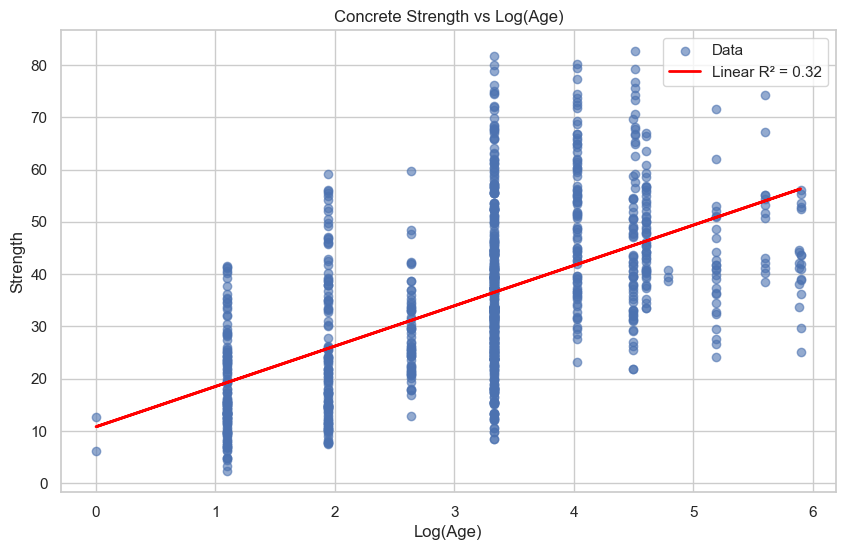

In [30]:
# Logarithmic transformation
concrete_data['Log_Age'] = np.log(concrete_data['Age'])

# Prepare the data for linear regression
X_log_age = concrete_data['Log_Age'].values.reshape(-1, 1)
y_strength = concrete_data['Strength'].values

# Fit the linear regression model
model_log_age = LinearRegression()
model_log_age.fit(X_log_age, y_strength)

# Predict the strength values
y_pred_log_age = model_log_age.predict(X_log_age)

# Calculate the R^2 value
r2_log_age = r2_score(y_strength, y_pred_log_age)

# Plotting Strength against Log(Age) for the concrete mixtures with regression line
plt.figure(figsize=(10, 6))
plt.scatter(concrete_data['Log_Age'], concrete_data['Strength'], alpha=0.6, label='Data')
plt.plot(concrete_data['Log_Age'], y_pred_log_age, color='red', linewidth=2, label=f'Linear R² = {r2_log_age:.2f}')
plt.title('Concrete Strength vs Log(Age)')
plt.xlabel('Log(Age)')
plt.ylabel('Strength')
plt.legend()
plt.grid(True)
plt.show()


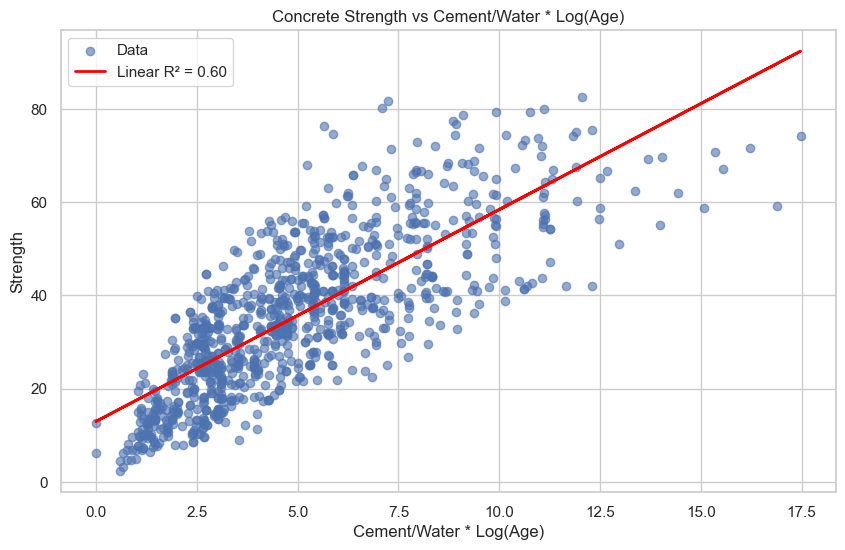

In [31]:
# Creating a new feature Cement_Water_Log_Age for the interaction between Cement/Water ratio and Log(Age)
concrete_data['Cement_Water_Ratio'] = concrete_data['Cement'] / (concrete_data['Water'] + 1e-5)  # Avoid division by zero
concrete_data['Cement_Water_Log_Age'] = concrete_data['Cement_Water_Ratio'] * concrete_data['Log_Age']

# Prepare the data for linear regression
X_cement_water_log_age = concrete_data['Cement_Water_Log_Age'].values.reshape(-1, 1)
y_strength = concrete_data['Strength'].values

# Fit the linear regression model
model_cement_water_log_age = LinearRegression()
model_cement_water_log_age.fit(X_cement_water_log_age, y_strength)

# Predict the strength values
y_pred_cement_water_log_age = model_cement_water_log_age.predict(X_cement_water_log_age)

# Calculate the R^2 value
r2_cement_water_log_age = r2_score(y_strength, y_pred_cement_water_log_age)

# Plotting Strength against Cement/Water * Log(Age) with regression line
plt.figure(figsize=(10, 6))
plt.scatter(concrete_data['Cement_Water_Log_Age'], concrete_data['Strength'], alpha=0.6, label='Data')
plt.plot(concrete_data['Cement_Water_Log_Age'], y_pred_cement_water_log_age, color='red', linewidth=2, label=f'Linear R² = {r2_cement_water_log_age:.2f}')
plt.title('Concrete Strength vs Cement/Water * Log(Age)')
plt.xlabel('Cement/Water * Log(Age)')
plt.ylabel('Strength')
plt.legend()
plt.grid(True)
plt.show()


### Correlation Analysis
We conducted an analysis of the correlation between features and the target variable, concrete strength.

The R² value, or coefficient of determination, measures how well the independent variables explain the variance in the dependent variable. It ranges from 0 to 1, with higher values indicating better model fit.

In our analysis of the concrete data:
- Initially, the R² value for Age alone was 0.11, indicating that only 11% of the variability in concrete strength was explained.
- Applying a logarithmic transformation to Age (Log(Age)) improved the R² value to 0.32, explaining 32% of the variance.
- By combining the features Cement, Water, and Log(Age) into a single composite feature (`Cement/Water * Log(Age)`), we achieved an R² value of 0.6, indicating that 60% of the variability in concrete strength could be explained by this combination.

Interestingly, the R² value obtained from the composite feature `Cement/Water * Log(Age)` is not significantly higher than the sum of the individual R² values for Cement, Water and log(Age) when considered separately. This suggests that while the combination of features improves the model's explanatory power, it does not capture much more variance than the sum of the individual contributions. 

This observation highlights the intuitive and domain-grounded significance of these factors in influencing concrete strength. However, it also underscores the complexity of detecting all possible interactions between features using simple linear methods. As a result, the next step will be to develop more sophisticated regression models that can better capture these interactions and provide more accurate predictions.

## 4. Machine Learning

### Methodology
1. **Data Splitting**:
   - **Training Set (70%)**: This set will be used to train the machine learning models.
   - **Development Set (15%)**: The dev set will be used for model validation and hyperparameter tuning.
   - **Testing Set (15%)**: The final model evaluation will be performed on this set to assess the model's generalization ability.

2. **Model Training**:
   - We will train three different models on the training set: Linear Regression, Decission Tree, Random Forest, and SVR.

3. **Model Tuning and Optimization**:
   - Using the development set, we will fine-tune the models' hyperparameters to optimize performance.

4. **Model Evaluation**:
   - The optimized models will be evaluated on the testing set. We will compare the models based on metrics such as Mean Squared Error (MSE) and R² Score to determine the best-performing model.

This structured approach ensures that the model evaluation is unbiased, as the testing set is only used for the final assessment after all model training and tuning are complete.


In [35]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Mixture Number,Water Category,Log_Age,Cement_Water_Ratio,Cement_Water_Log_Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,181,Low Water,3.332205,3.333333,11.107348
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,182,Low Water,3.332205,3.333333,11.107348
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,291,High Water,5.598422,1.458333,8.164365
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,291,High Water,5.899897,1.458333,8.604017
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,274,Medium Water,5.886104,1.034375,6.088439


### 4.1 Regression Analysis

We will perform a regression analysis on a dataset with the target variable "Strength". 
We will first split the data into training and test sets. The training set will then be split multiple times into training and development sets to evaluate the model.

#### Data Usage and Model Comparison

Initially, we will use only the cleaned raw data, without any feature-engineered columns, to build our regression model. This will serve as a baseline to evaluate the model's performance using the original features.
Afterwards, we will standarize the features to get a better sense of coeffizients.
Subsequently, we will introduce new columns derived from feature engineering techniques. These engineered features will potentially enhance the model's predictive power. By comparing the performance metrics of the models with and without these new features, we aim to understand the impact of feature engineering on our regression model's accuracy and robustness.

#### Regression with cleaned Raw Data

In [38]:
# Define the columns to include
columns = [
    'Cement', 'Blast Furnace Slag', 'Fly Ash', 
    'Water', 'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Age', 'Strength'
]

# Create a new DataFrame with only the specified columns
data=concrete_data[columns]
# Display the first few rows of the raw data
data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the target and features
X = data.drop('Strength', axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

Mean R²: 0.5911, Std R²: 0.0474
Mean RMSE: 10.1798, Std RMSE: 0.4497


In [41]:
# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Manually set the mean coefficients and intercept
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Test R²: 0.5804
Test RMSE: 11.1880


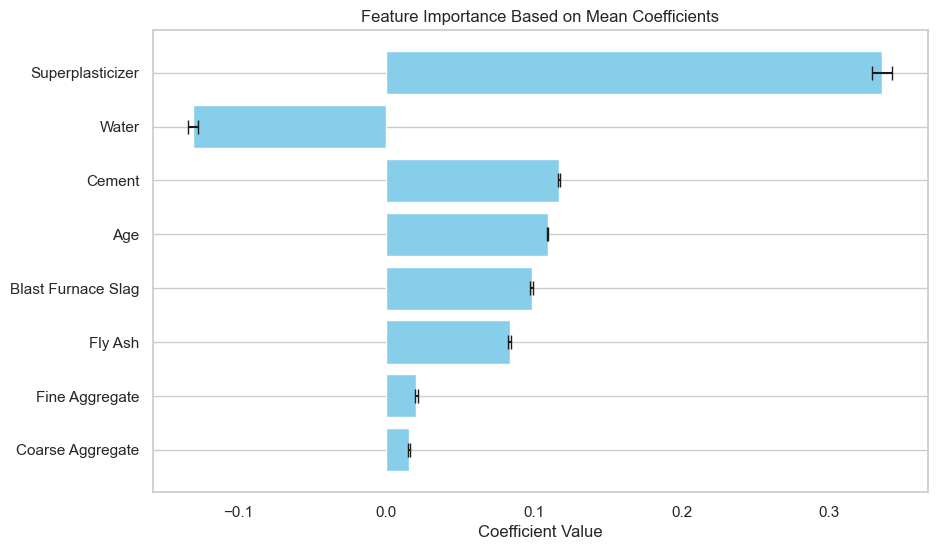

In [42]:
# Extract feature names and mean coefficients
feature_names = X.columns
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Mean Coefficients')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


#### Standardization of Features: An Essential Step in Data Preprocessing

In data science and machine learning, standardizing features is a crucial preprocessing step to prepare data for analysis. This process, also known as z-score normalization, adjusts feature values to have a mean of zero and a standard deviation of one. Standardization is important for various reasons, including improving the efficiency of gradient-based algorithms, enhancing model performance, and making model coefficients more interpretable. It also helps in making the data more robust to outliers and prepares it for further processing steps like Principal Component Analysis (PCA).

Mean R²: 0.5905, Std R²: 0.0437
Mean RMSE: 10.1733, Std RMSE: 0.4642
Test R²: 0.5806
Test RMSE: 11.1860


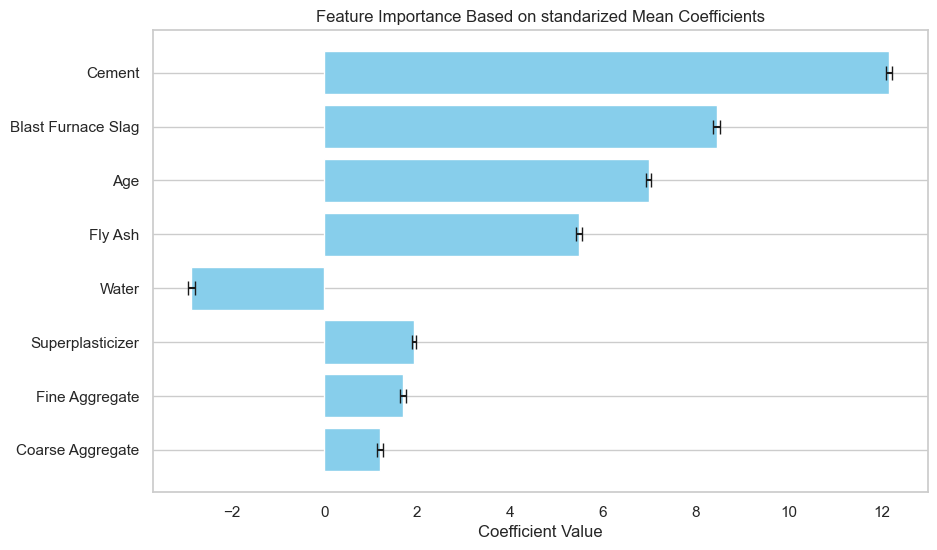

In [44]:
X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Extract feature names and mean coefficients
feature_names = X.columns
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on standarized Mean Coefficients')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


Standardizing the features did not lead to significant improvements in R². However, it can be observed that the feature importances have changed after standardization. 
This change occurs because standardization transforms the features to have a mean of 0 and a standard deviation of 1. As a result, the model treats all features on the same scale, preventing features with larger magnitudes from dominating the model's learning process. This can lead to a more balanced assessment of each feature's contribution, altering the perceived importances.

#### Regression Model with $log(Age)$ Feature

In [47]:
# Define the columns to include
columns = [
    'Cement','Water','Log_Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]
# Display the first few rows of the raw data
data.head()


,Cement,Water,Log_Age,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,540.0,162.0,3.332205,0.0,0.0,2.5,1040.0,676.0,79.99
1,540.0,162.0,3.332205,0.0,0.0,2.5,1055.0,676.0,61.89
2,332.5,228.0,5.598422,142.5,0.0,0.0,932.0,594.0,40.27
3,332.5,228.0,5.899897,142.5,0.0,0.0,932.0,594.0,41.05
4,198.6,192.0,5.886104,132.4,0.0,0.0,978.4,825.5,44.30


Mean R²: 0.8061, Std R²: 0.0229
Mean RMSE: 7.0341, Std RMSE: 0.4148
Test R²: 0.8037
Test RMSE: 7.6530


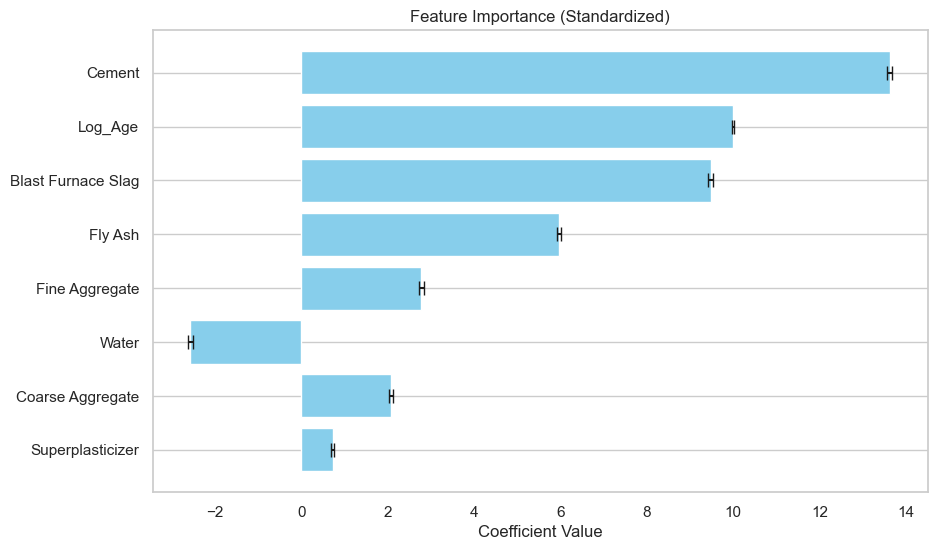

In [48]:

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Extract feature names and mean coefficients
feature_names = X.columns
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Standardized)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


#### Model Summary

The linear regression model for predicting concrete compressive strength, based on features such as cement content and water ratio, showed generally good results:
The Mean R² value of approximately 0.81 indicates that the model explains about 81% of the variance in concrete compressive strength. The RMSE, which measures the average prediction error, is around 7, suggesting moderate accuracy. The model provides reasonably predictions while remaining simple and easy to interpret.

#### Further Model Examination

1. **Residual Plot**: Shows residuals randomly scattered around zero, indicating no systematic errors or patterns, fulfilling the assumption of linearity.

2. **Histogram of Residuals**: Displays a normal distribution of residuals, confirming the assumption of normally distributed errors.

3. **Predicted vs Actual Plot**: Points closely follow the 45-degree line, indicating that the model predicts well.

4. **QQ Plot**: Residuals align well with the reference line, confirming normality and no significant outliers.

All conditions for a good linear regression model are met, ensuring the model's assumptions are satisfied.

We can use the following code to save and then load the model later and compare it with other models.

<Figure size 1200x1000 with 0 Axes>

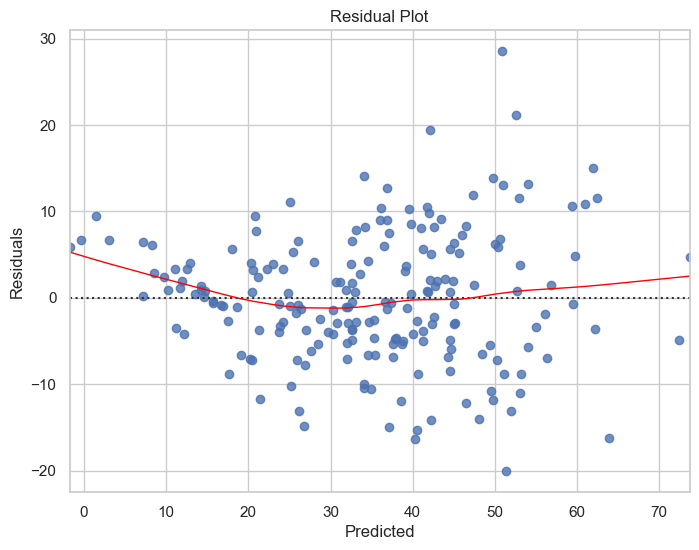

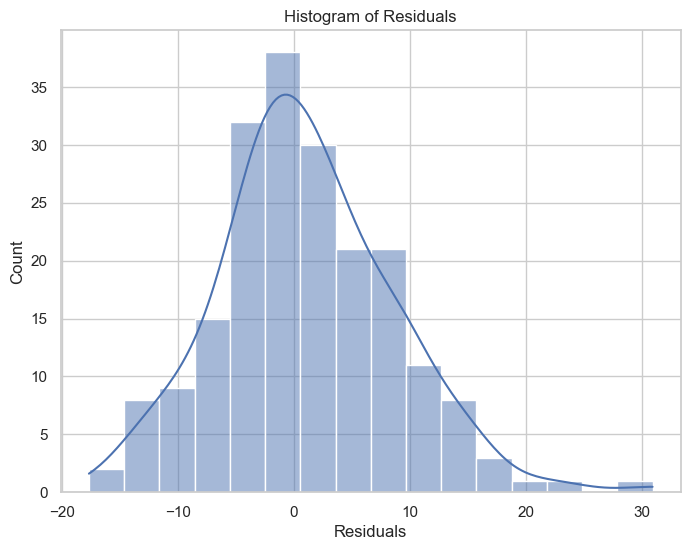

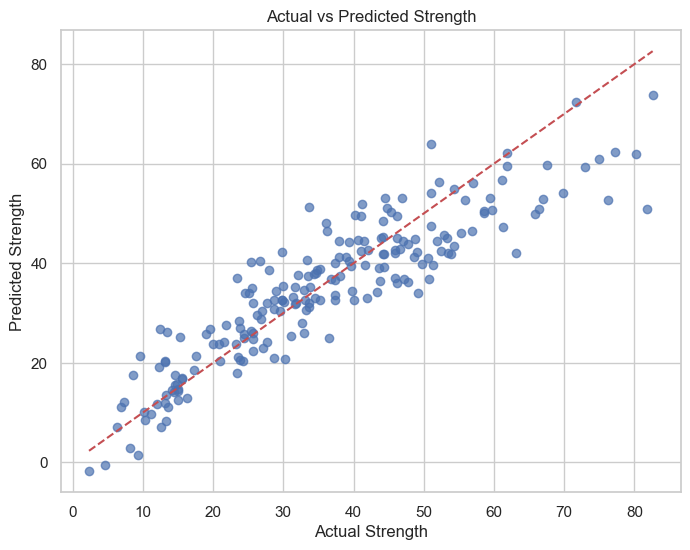

<Figure size 800x600 with 0 Axes>

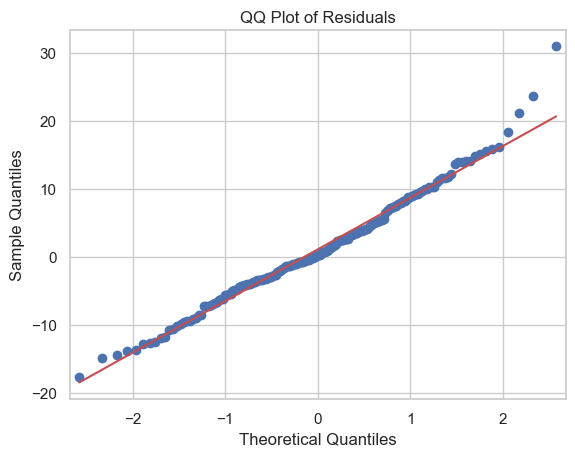

In [51]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming X_test, y_test, X_train_full, and y_train_full are already defined and scaled
# X_test_sm = sm.add_constant(X_test)  # Ensure the test set includes the constant term

# Predictions
y_test_pred = final_model.predict(X_test)

# Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 10))

# 1. Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# 3. Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength')
plt.grid(True)
plt.show()

# 4. QQ Plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

In [52]:
import joblib

# Final model with mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Name for the model
model_name = 'regression_concrete_strength_model.joblib'

# Save the model
joblib.dump(final_model, model_name)

print(f"Model saved as {model_name}")

Model saved as regression_concrete_strength_model.joblib


#### Model with Features from EDA

Let us examine our engineered Feature **$Cement/Water*log(Age)$** 

In [54]:
# Define the columns to include
columns = [
    'Cement_Water_Log_Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]
# Display the first few rows of the raw data
data.head()


,Cement_Water_Log_Age,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,11.107348,0.0,0.0,2.5,1040.0,676.0,79.99
1,11.107348,0.0,0.0,2.5,1055.0,676.0,61.89
2,8.164365,142.5,0.0,0.0,932.0,594.0,40.27
3,8.604017,142.5,0.0,0.0,932.0,594.0,41.05
4,6.088439,132.4,0.0,0.0,978.4,825.5,44.30


Mean R²: 0.7310, Std R²: 0.0264
Mean RMSE: 8.1464, Std RMSE: 0.3981
Test R²: 0.7478
Test RMSE: 8.6740


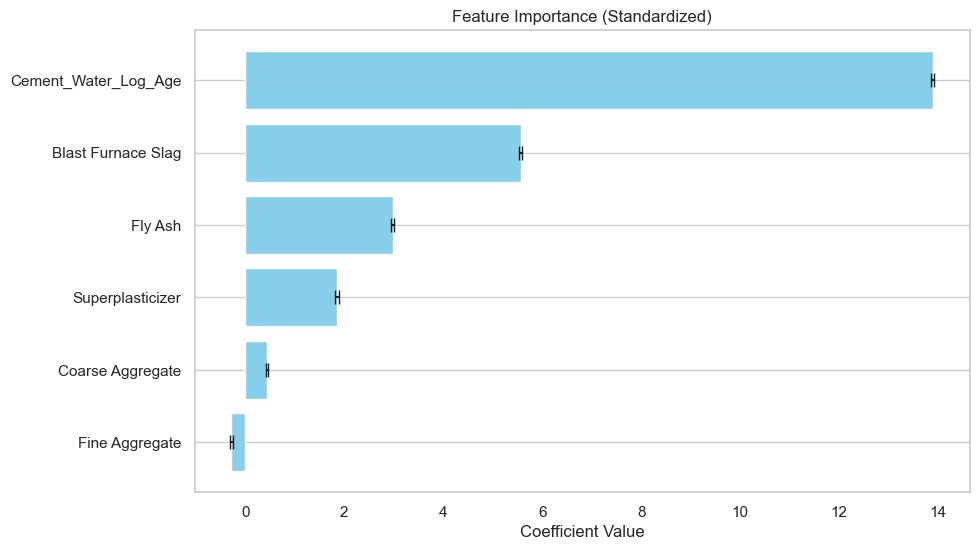

In [55]:

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Extract feature names and mean coefficients
feature_names = X.columns
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Standardized)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


This model, using Cement, Water and Age as one feature has a lower $R²$ value compared to the original model with $Log(Age)$ and the remaining standardized features.

#### Regression including Interaction Terms

Interaction terms in regression models capture how the effect of one predictor variable depends on another. While they can provide valuable insights, their inclusion must be approached with caution due to several challenges:

1. **Increased Complexity**: Interaction terms add more coefficients to the model, complicating estimation and interpretation. This complexity can lead to overfitting, capturing noise instead of meaningful relationships.

2. **Interpretability**: The coefficients of interaction terms are not straightforward. A positive coefficient for an interaction term indicates a varying relationship between variables, not necessarily a positive combined effect, requiring careful interpretation.

3. **Multicollinearity**: Interaction terms can increase multicollinearity, where predictor variables are highly correlated, making it difficult to identify significant predictors.

To ensure interaction terms are beneficial, we must evaluate whether they significantly improve model quality. This can be done by comparing models with and without interaction terms using metrics like R² and RMSE, and by checking the statistical significance of the coefficients. Such evaluations help determine if the added complexity of interaction terms is justified by better predictive performance.

In [58]:
# Define the columns to include
columns = [
    'Cement','Water','Log_Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]


Mean R²: 0.8457, Std R²: 0.0223
Mean RMSE: 6.1497, Std RMSE: 0.3185
Test R²: 0.8668
Test RMSE: 6.3033


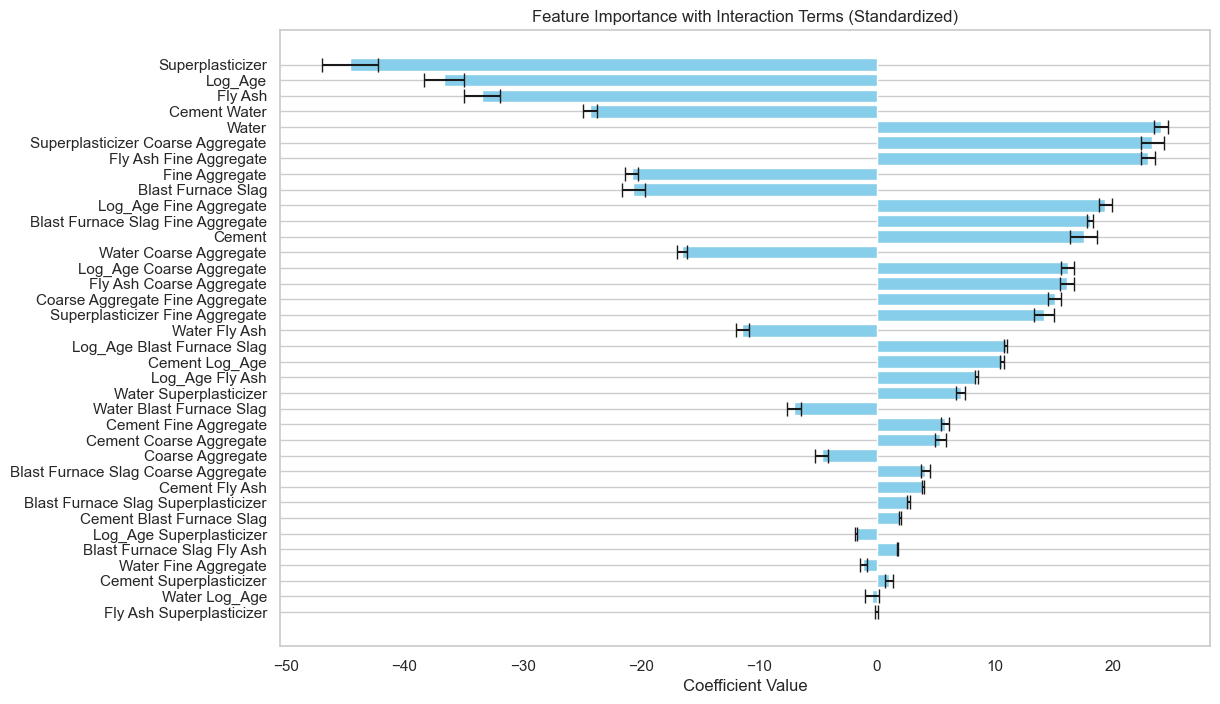

In [59]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Generate interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Get the names of the interaction features
interaction_feature_names = poly.get_feature_names_out(X.columns)

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Extract feature names and mean coefficients
feature_names = interaction_feature_names
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance with Interaction Terms (Standardized)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [60]:
# Save Model
final_model_2 = LinearRegression()
final_model_2.coef_ = mean_coefficients
final_model_2.intercept_ = mean_intercept

# Name for the model
model_name = 'regression_concrete_strength_model_with_Interactions.joblib'

# Save the model
joblib.dump(final_model_2, model_name)

print(f"Model saved as {model_name}")

Model saved as regression_concrete_strength_model_with_Interactions.joblib


A model with many interaction terms often delivers a higher R² value, indicating better fit to the training data. However, such models also tend to become very complex. This complexity can make the model difficult to interpret and explain. 

Thus, a crucial consideration arises: do we prioritize the explainability of a model or its precision? Or perhaps, we should aim for a compromise? Balancing the need for a model that is both interpretable and accurate is often essential, depending on the specific application and the stakeholders' needs.

To include only significant terms in the regression model, we can use techniques like backward elimination, forward selection, or Lasso regression. For this example, we'll use Lasso regression, which can automatically select significant features by applying L1 regularization, which shrinks less important feature coefficients to zero.

Here's the modified code to include only significant interaction terms using **Lasso regression**:

Mean R²: 0.8171, Std R²: 0.0272
Mean RMSE: 6.7039, Std RMSE: 0.4016
Test R²: 0.8250
Test RMSE: 7.2254


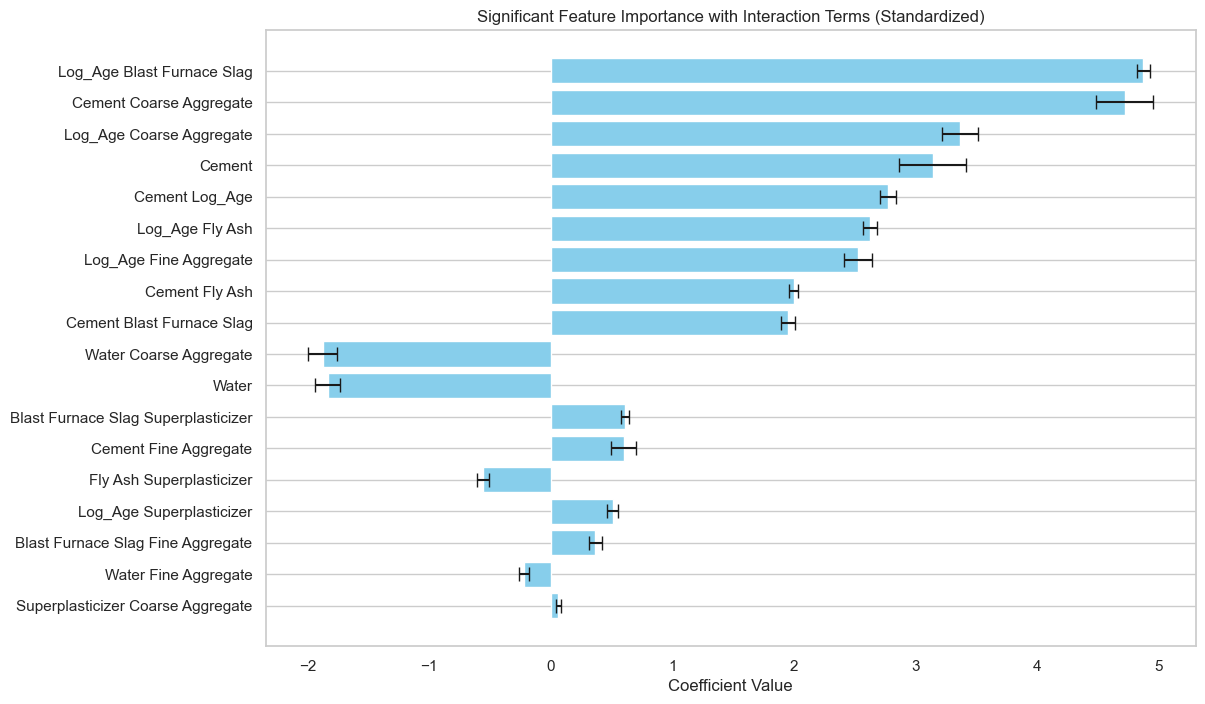

In [62]:
from sklearn.linear_model import Lasso

# Generate interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Get the names of the interaction features
interaction_feature_names = poly.get_feature_names_out(X.columns)

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Lasso model for feature selection
lasso = Lasso(alpha=0.2)  # You may need to adjust alpha for your specific case

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate  and print R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': interaction_feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Filter out the non-significant coefficients (those close to zero)
significant_df = importance_df[importance_df['Coefficient'].abs() > 0.01]  # Adjust threshold as needed

# Sort by absolute value of coefficients to highlight the most impactful features
significant_df['Abs_Coefficient'] = significant_df['Coefficient'].abs()
significant_df = significant_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars for significant features
plt.figure(figsize=(12, 8))
plt.barh(significant_df['Feature'], significant_df['Coefficient'], xerr=significant_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Significant Feature Importance with Interaction Terms (Standardized)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

#### Conclusion on Interaction Terms in Regression Models

The inclusion of interaction terms in our regression model did not lead to a significant improvement in overall predictive performance, as indicated by the modest changes in metrics like R² and RMSE. However, the model became considerably more complex, introducing challenges in interpretation and potential issues with multicollinearity. Despite these limitations, the analysis of interaction terms provides valuable insights into the underlying relationships between the ingredients and the concrete's aging process. Specifically, the interaction model suggests that the stabilization and strength development of concrete are significantly influenced by the composition of the mix, particularly the proportions of cement, water, and aggregates, and their interaction with the curing age.

These findings imply that the aging process and final properties of concrete are not solely dependent on the individual ingredients but also on how these ingredients interact over time. For instance, the significant interaction between cement content and the logarithmic age indicates that the rate at which concrete gains strength could vary depending on the amount of cement, influenced further by other factors like water and coarse aggregates. Such interactions can affect the hydration process, leading to different stabilization behaviors in the concrete matrix.

Given these considerations, while the inclusion of interaction terms can provide a deeper understanding of the factors influencing concrete's aging and stabilization, it also adds complexity to the model. Therefore, in practical applications, one must weigh the benefits of such detailed insights against the challenges of increased model complexity and potential multicollinearity. In this specific case, I recommend not including interaction terms in the final predictive model due to the marginal gains in accuracy, which do not justify the added complexity and difficulty in interpreting the results. However, the insights gained from exploring these interactions should inform future experimental designs and optimization strategies in concrete formulation.

#### Exclude Aging Factor

In this analysis, we focus on constructing a regression model to predict the strength of concrete while excluding the variable `age`. This decision is based on two key considerations:

1. **Achievement of Full Strength**: Concrete typically reaches most of its strength within the first 28 days of curing. As a result, the strength values at 28 days are a reliable indicator of the material's ultimate strength. By limiting our analysis to samples that are exactly 28 days old, we aim to standardize the comparison and avoid the variability introduced by different curing times.

2. **Data Availability**: The dataset predominantly contains samples measured at 28 days, providing a more consistent and representative subset for analysis. Focusing on this subset allows us to leverage the most complete and relevant data available, ensuring robust model training and evaluation.

By filtering the data to include only 28-day samples, we can better understand the influence of other factors, such as cement, water, and additives, on the concrete's strength. This approach also simplifies the model, making it more interpretable and focused on the most critical period of strength development.


In [65]:
# Define the columns to include
columns = [
    'Cement','Water','Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]
# Filter the data for samples with age = 28 days
data = data[data['Age'] == 28]
# Display the first few rows of the raw data
data.head()


,Cement,Water,Age,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,540.0,162.0,28,0.0,0.0,2.5,1040.0,676.0,79.99
1,540.0,162.0,28,0.0,0.0,2.5,1055.0,676.0,61.89
7,380.0,228.0,28,95.0,0.0,0.0,932.0,594.0,36.45
8,266.0,228.0,28,114.0,0.0,0.0,932.0,670.0,45.85
9,475.0,228.0,28,0.0,0.0,0.0,932.0,594.0,39.29


In [66]:
X = data.drop(['Strength', 'Age'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Print the sizes of each set
print("Training set size:", X_train_full.shape)
print("Development set size:", X_dev.shape)
print("Testing set size:", X_test.shape)

Training set size: (335, 7)
Development set size: (161, 36)
Testing set size: (84, 7)


Mean R²: 0.7103, Std R²: 0.0672
Mean RMSE: 7.1718, Std RMSE: 0.6938
Test R²: 0.8226
Test RMSE: 7.1092


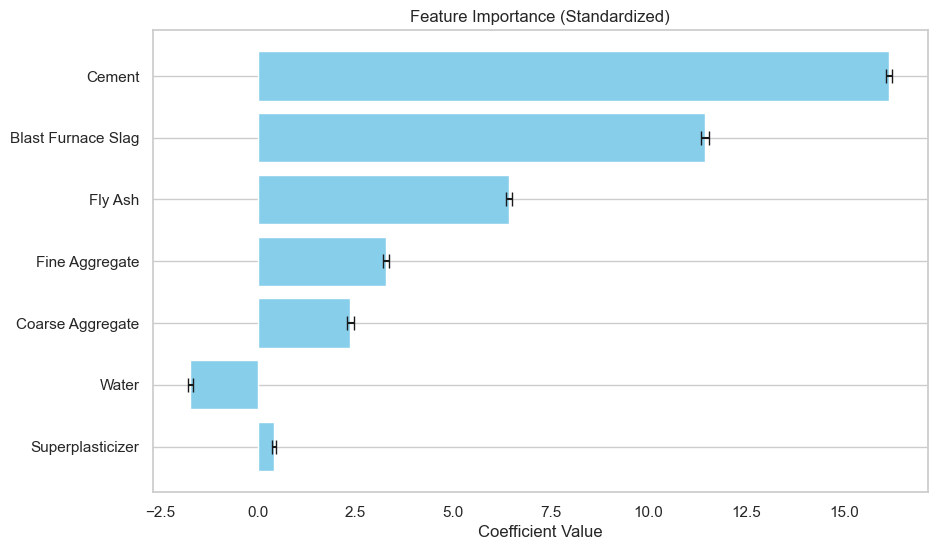

In [67]:
r2_scores = []
rmse_scores = []
coefficients = []
intercepts = []

# Perform the loop for 50 iterations
for _ in range(50):
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    
    r2 = r2_score(y_dev, y_pred)
    rmse = np.sqrt(mean_squared_error(y_dev, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    coefficients.append(model.coef_)
    intercepts.append(model.intercept_)

# Calculate mean and standard deviation of R² and RMSE
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")
print(f"Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")

# Calculate mean coefficients and intercept from all models
mean_coefficients = np.mean(coefficients, axis=0)
mean_intercept = np.mean(intercepts)

# Calculate standard error of the coefficients
se_coefficients = np.std(coefficients, axis=0) / np.sqrt(len(coefficients))

# Create the final model using the mean coefficients and intercept
final_model = LinearRegression()
final_model.coef_ = mean_coefficients
final_model.intercept_ = mean_intercept

# Predict on test data using the model with mean coefficients and intercept
y_test_pred = final_model.predict(X_test)

# Calculate  and print R² and RMSE for test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Extract feature names and mean coefficients
feature_names = X.columns
feature_importance = mean_coefficients

# Create a DataFrame to display the feature importance and standard errors
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mean_coefficients,
    'Standard Error': se_coefficients
})

# Sort by absolute value of coefficients to highlight the most impactful features
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance with error bars
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], xerr=importance_df['Standard Error'], color='skyblue', capsize=5)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Standardized)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


#### Analysis of Concrete Strength Model for 28-Day Samples

Filtering the data to only 28-day samples reduced the influence of water on strength. The $R^2$ value is also slightly lower, likely because not all samples reach maximum strength at 28 days. This suggests that while 28 days is a common benchmark, variations in strength gain can still occur beyond this period.

#### Conclusion

We tested various linear regression models, including models with interaction terms. While these complex models achieved the highest R² values, they did not significantly outperform the simpler linear model with standardizing and applying a logarithmic transformation to the "Age" feature. But it always depends on the specific question or objective. Currently, as our goal is to compare different models, we first look at how well these models perform. Ultimately, we aim to select the best model based on its performance and simplicity. 

In [70]:
# Load the saved model
regression_model = joblib.load('regression_concrete_strength_model.joblib')

# Use loaded_model for predictions or further analysis
# y_loaded_pred = regression_model.predict(X_test)

# # Example: Compare predictions from the saved model with the actual values
# test_r2_loaded = r2_score(y_test, y_loaded_pred)
# test_rmse_loaded = np.sqrt(mean_squared_error(y_test, y_loaded_pred))

# print(f"Loaded Model Test R²: {test_r2_loaded:.4f}")
# print(f"Loaded Model Test RMSE: {test_rmse_loaded:.4f}")


### 4.2 Decision Tree and Hyperparameters

#### Decision Tree
A Decision Tree is a machine learning model used for both classification and regression tasks. It works by splitting the dataset into subsets based on the value of input features. This process is repeated recursively, forming a tree-like structure of decisions. Each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an output value (prediction).

#### Key Hyperparameters

1. **`max_depth`**:
   - **Description**: This parameter controls the maximum depth of the tree. Limiting the depth of the tree helps prevent overfitting by ensuring the tree does not become too complex and tailored to the training data.
   - **Typical Values**: Integers (e.g., 3, 5, 7), or `None` (no limit).

2. **`min_samples_split`**:
   - **Description**: This parameter specifies the minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns (overfitting) by ensuring nodes have enough data to justify a split.
   - **Typical Values**: Integers (e.g., 2, 5, 10, 20).

3. **`min_samples_leaf`**:
   - **Description**: This parameter determines the minimum number of samples that must be present in a leaf node. It helps smooth the model by avoiding splits that result in leaves with very few samples.
   - **Typical Values**: Integers (e.g., 1, 2, 4, 6).

4. **`max_features`**:
   - **Description**: This parameter defines the number of features to consider when looking for the best split. By limiting the number of features, the model can become more robust and avoid overfitting.
   - **Typical Values**: `None` (use all features), `'sqrt'` (square root of the number of features), `'log2'` (logarithm base 2 of the number of features).

#### Grid Search with Cross-Validation
To find the optimal hyperparameters for a Decision Tree, `GridSearchCV` is used. This method performs an exhaustive search over a specified parameter grid with cross-validation, evaluating different combinations of hyperparameters to select the best-performing model.

Best hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train R²: 0.8965
Train RMSE: 5.1508
Train MAE: 3.8836
Test R²: 0.7975
Test RMSE: 7.7721
Test MAE: 5.8788


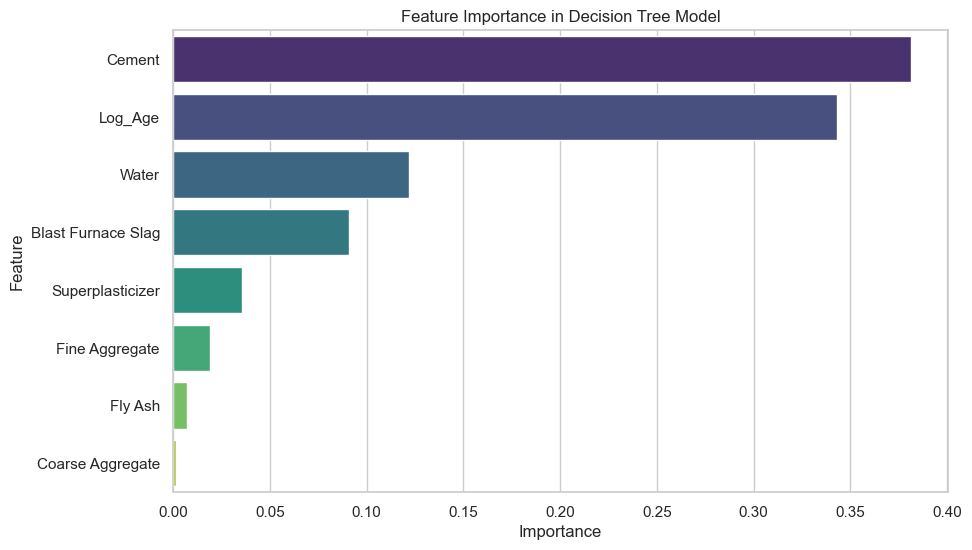

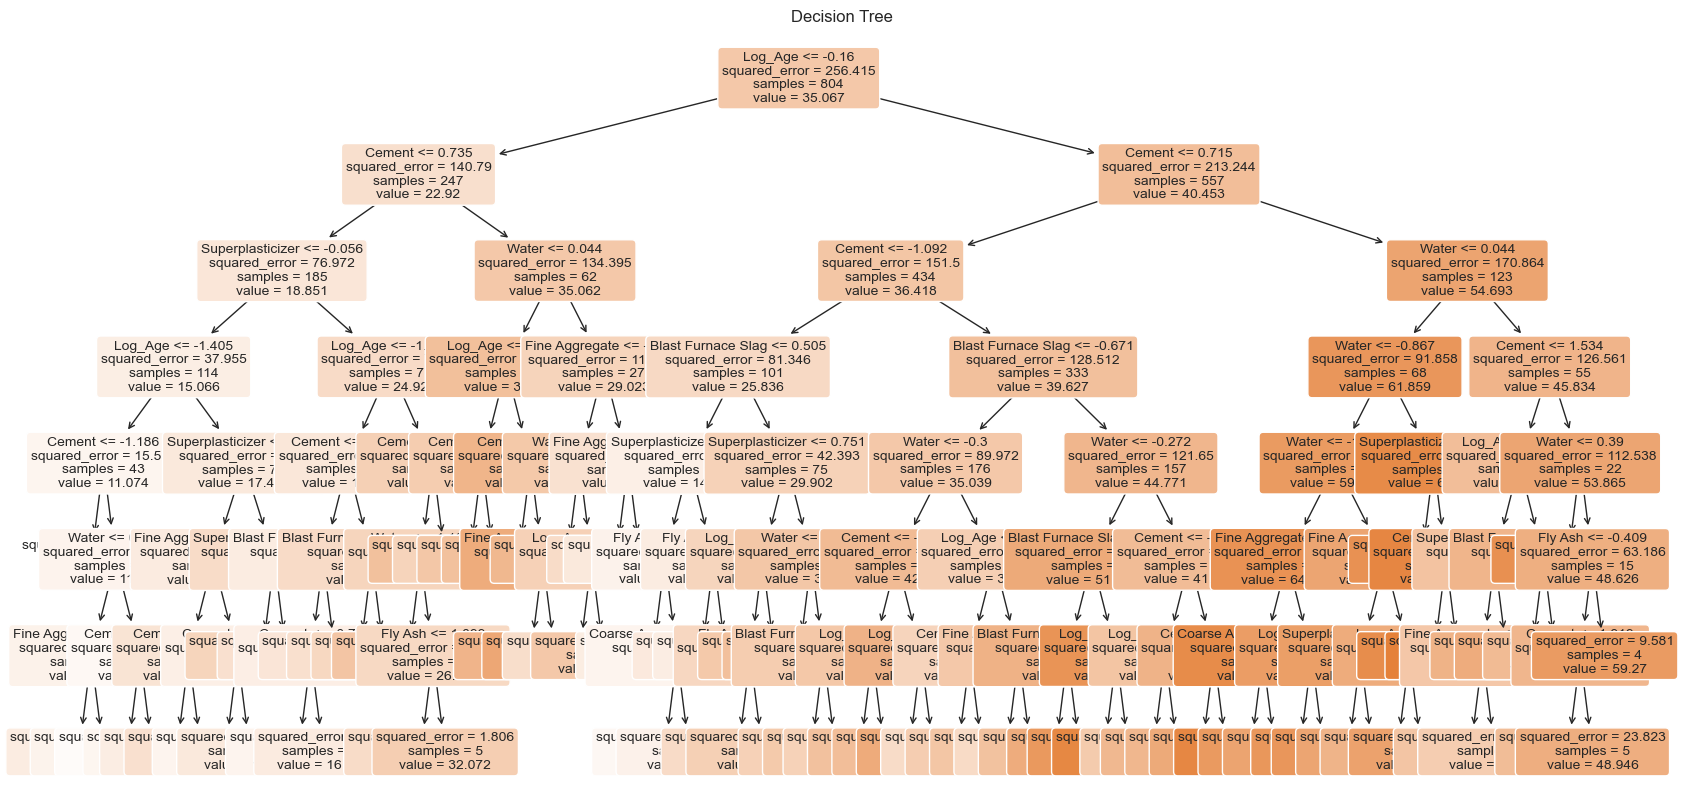

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot

# Define the columns to include
columns = [
    'Cement','Water','Log_Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 6, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train_full, y_train_full)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Predictions with the best model
y_train_pred = best_model.predict(X_train_full)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_r2 = r2_score(y_train_full, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_full, y_train_pred))
train_mae = mean_absolute_error(y_train_full, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Feature Importance
feature_importance = best_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

# 6. Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree')
plt.show()


#### Understanding Feature Importance

Feature importance quantifies the relative importance of each feature in predicting the target variable. It indicates how much each feature contributes to the model's decision-making process.

##### How Feature Importance is Calculated:

1. **Gini Importance (Mean Decrease in Impurity)**:
   - For classification trees, feature importance is often calculated using the Gini impurity or entropy. For regression trees, it’s calculated using variance reduction.
   - Every time a feature is used to split a node, it contributes to the reduction in the impurity measure (Gini, entropy, variance, etc.).
   - The importance of a feature is the sum of the impurity reduction across all nodes where the feature is used, normalized by the total reduction in impurity for the entire tree.

2. **Mean Decrease Accuracy**:
   - This method involves permuting (shuffling) each feature and measuring how much the permutation decreases the model's accuracy. The idea is that if permuting a feature results in a significant drop in accuracy, the feature is important.

##### Unit of Feature Importance:

- **Relative Measure**: Feature importance scores are relative measures, meaning they are on a relative scale rather than an absolute one.
- **Sum to 1**: In `sklearn`, feature importance scores for all features sum to 1 (or 100% if expressed as a percentage).
- **No Specific Unit**: Feature importance does not have a specific unit. It’s a normalized score that indicates the contribution of each feature to the model's predictions.

##### Interpretation:

- **Higher Importance**: A higher feature importance score means the feature has a larger effect on the target variable and is more important for making accurate predictions.
- **Comparative**: You can compare the importance scores to see which features are most influential. For example, a feature with an importance score of 0.4 is twice as important as one with a score of 0.2.

##### Key Takeaways:

- **No Absolute Unit**: Feature importance values are unitless and represent the relative contribution of each feature.
- **Sum to 1**: The total importance across all features adds up to 1, making it easy to compare the contributions.
- **Model-Specific**: Importance scores are specific to the trained model and can differ across models or training runs due to different data splits or hyperparameters.

Understanding feature importance helps in interpreting the model, identifying key drivers in the data, and potentially refining the model by focusing on the most impactful features.
#### Evaluating the Decision Tree Model

Given the results:

    Training Performance:
        Train R² (0.8965): Indicates that the model fits the training data well.
    Test Performance:
        Test R² (0.7975): Slightly lower than the training R², which is expected. It shows that the model has room for improvement.
        Test RMSE (7.7721) and MAE (5.8788): The errors on the test data are reasonably close to those on the training data, suggesting generalization.

Conclusion:

There is a noticeable gap between training and testing performance, which suggests the model could benefit from further tuning or additional techniques to improve generalization.


### 4.3 Random Forest Regressor

An ensemble method that builds multiple decision trees and averages their predictions, typically providing better performance and generalization.
Here's how you can switch to a Random Forest model to potentially improve performance:

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train R²: 0.9841
Train RMSE: 2.0169
Train MAE: 1.3385
Test R²: 0.9114
Test RMSE: 5.1413
Test MAE: 3.4794


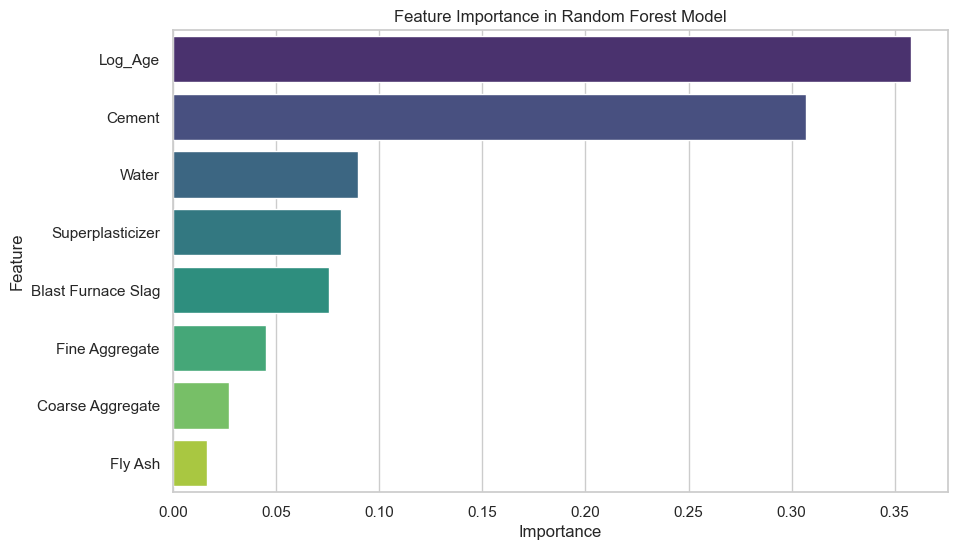

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Logarithmic transformation
concrete_data['Log_Age'] = np.log(concrete_data['Age'])

# Define the columns to include
columns = [
    'Cement','Water','Log_Age','Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_rf.fit(X_train_full, y_train_full)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_rf.best_params_}")

# Predictions with the best model
y_train_pred_rf = best_rf_model.predict(X_train_full)
y_test_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
train_r2_rf = r2_score(y_train_full, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train_full, y_train_pred_rf))
train_mae_rf = mean_absolute_error(y_train_full, y_train_pred_rf)

test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"Train R²: {train_r2_rf:.4f}")
print(f"Train RMSE: {train_rmse_rf:.4f}")
print(f"Train MAE: {train_mae_rf:.4f}")

print(f"Test R²: {test_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Test MAE: {test_mae_rf:.4f}")

# Feature Importance
feature_importance_rf = best_rf_model.feature_importances_
features = X.columns

importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.show()


#### Evaluating the Random Forest Model

Given the results:

1. **High Training Performance**:
   - **Train R² (0.9841)**: Indicates that the model fits the training data very well.
   - **Train RMSE (2.0169) and MAE (1.3385)**: Very low training errors, suggesting a good fit to the training data.

2. **Improved Test Performance**:
   - **Test R² (0.9114)**: Significantly high, indicating that the model generalizes well to the test data.
   - **Test RMSE (5.1413) and MAE (3.4794)**: Lower errors compared to previous models, indicating better generalization.

##### Conclusion:
The Random Forest model performs well on both training and test data, showing high R² values and relatively low RMSE and MAE. While the training performance is very high, the test performance is also strong, suggesting that this model generalizes better than the previous Decision Tree models.


### 4.4 Gradient Boosting Machines (GBM)

Gradient Boosting is a powerful model that builds trees sequentially, with each tree trying to correct the errors of the previous ones. It is particularly effective for complex, non-linear relationships in data.

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming concrete_data is already loaded as a DataFrame

# Define the columns to include
columns = [
    'Cement', 'Water', 'Log_Age', 'Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Define the parameter grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_gbm.fit(X_train_full, y_train_full)

# Get the best model
best_gbm_model = grid_search_gbm.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_gbm.best_params_}")

# Predictions with the best model
y_train_pred_gbm = best_gbm_model.predict(X_train_full)
y_test_pred_gbm = best_gbm_model.predict(X_test)

# Evaluate the best model
train_r2_gbm = r2_score(y_train_full, y_train_pred_gbm)
train_rmse_gbm = np.sqrt(mean_squared_error(y_train_full, y_train_pred_gbm))
train_mae_gbm = mean_absolute_error(y_train_full, y_train_pred_gbm)

test_r2_gbm = r2_score(y_test, y_test_pred_gbm)
test_rmse_gbm = np.sqrt(mean_squared_error(y_test, y_test_pred_gbm))
test_mae_gbm = mean_absolute_error(y_test, y_test_pred_gbm)

print(f"Train R²: {train_r2_gbm:.4f}")
print(f"Train RMSE: {train_rmse_gbm:.4f}")
print(f"Train MAE: {train_mae_gbm:.4f}")

print(f"Test R²: {test_r2_gbm:.4f}")
print(f"Test RMSE: {test_rmse_gbm:.4f}")
print(f"Test MAE: {test_mae_gbm:.4f}")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Train R²: 0.9918
Train RMSE: 1.4469
Train MAE: 0.8347
Test R²: 0.9443
Test RMSE: 4.0751
Test MAE: 2.6548


### 4.5 Support Vector Machines (SVM)

In SVM, the goal is to find the optimal hyperplane that best separates the data points of different classes (for classification) or fits the data (for regression). 
A hyperplane is a decision boundary that separates different classes in the feature space. In a 2D space, it's a line; in 3D, it's a plane; and in higher dimensions, it's a hyperplane.

In [80]:

from sklearn.svm import SVR

# Define the columns to include
columns = [
    'Cement', 'Water', 'Log_Age', 'Blast Furnace Slag', 'Fly Ash',
    'Superplasticizer', 'Coarse Aggregate', 
    'Fine Aggregate', 'Strength'
]

# Create a new DataFrame with only the specified columns
data = concrete_data[columns]

X = data.drop(['Strength'], axis=1)
y = data['Strength']

# Split data into initial training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only relevant if 'poly' kernel is selected
}

# Initialize the SVM Regressor
svm_model = SVR()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search_svm.fit(X_train_full, y_train_full)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_svm.best_params_}")

# Predictions with the best model
y_train_pred_svm = best_svm_model.predict(X_train_full)
y_test_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model
train_r2_svm = r2_score(y_train_full, y_train_pred_svm)
train_rmse_svm = np.sqrt(mean_squared_error(y_train_full, y_train_pred_svm))
train_mae_svm = mean_absolute_error(y_train_full, y_train_pred_svm)

test_r2_svm = r2_score(y_test, y_test_pred_svm)
test_rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
test_mae_svm = mean_absolute_error(y_test, y_test_pred_svm)

print(f"Train R²: {train_r2_svm:.4f}")
print(f"Train RMSE: {train_rmse_svm:.4f}")
print(f"Train MAE: {train_mae_svm:.4f}")

print(f"Test R²: {test_r2_svm:.4f}")
print(f"Test RMSE: {test_rmse_svm:.4f}")
print(f"Test MAE: {test_mae_svm:.4f}")


Best hyperparameters: {'C': 10, 'degree': 2, 'epsilon': 0.5, 'kernel': 'rbf'}
Train R²: 0.9197
Train RMSE: 4.5366
Train MAE: 3.0301
Test R²: 0.8855
Test RMSE: 5.8439
Test MAE: 3.7770


#### Feature Importance

Support Vector Machines (SVM), unlike decision trees or linear models, do not inherently provide a straightforward feature importance measure. This is because SVMs, especially when using non-linear kernels like RBF or polynomial, create decision boundaries in a transformed feature space, making it difficult to directly interpret the importance of the original features.

However, there are a few approaches you can use to approximate feature importance in SVMs:
1. Coefficients for Linear Kernel:

    If you are using a linear SVM (kernel='linear'), the coefficients of the hyperplane can be interpreted similarly to linear regression coefficients, providing a sense of feature importance.
    Features with larger absolute coefficient values are more important.

In [82]:
if best_svm_model.kernel == 'linear':
    feature_importance_svm = np.abs(best_svm_model.coef_).flatten()
    importance_df_svm = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importance_svm
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df_svm, palette='viridis')
    plt.title('Feature Importance in Linear SVM Model')
    plt.show()


2. Permutation Importance:

    Permutation importance is a model-agnostic method that works by shuffling the values of each feature and measuring how much the shuffling decreases the model's performance. Features that cause a significant drop in performance are considered important.
    This method can be used for any SVM model, regardless of the kernel.

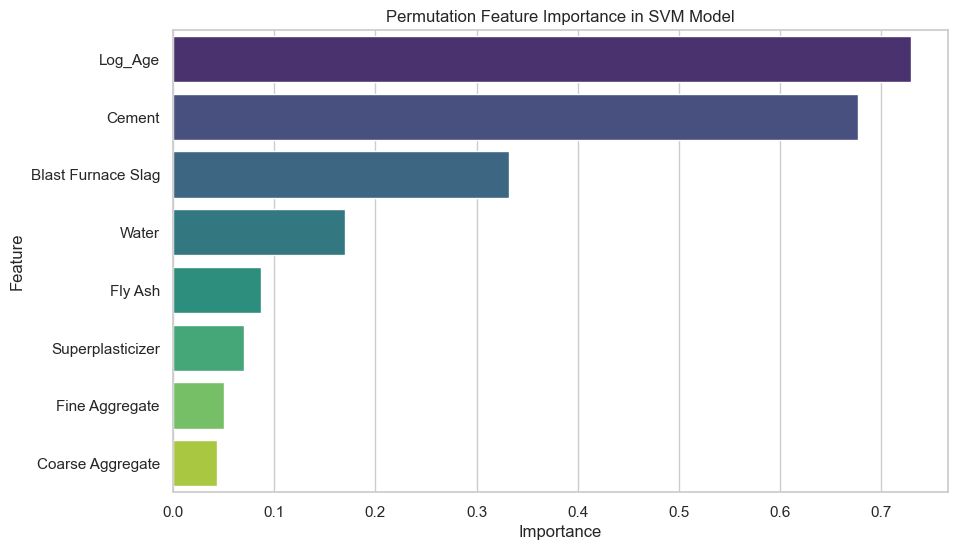

In [84]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(best_svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to display the feature importance
importance_df_perm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot the permutation feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_perm, palette='viridis')
plt.title('Permutation Feature Importance in SVM Model')
plt.show()
